In [1]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.interpolate import UnivariateSpline # curva sigmoide suavizada
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação do modelo logístico binário
from statstests.process import stepwise # procedimento Stepwise
from scipy import stats # estatística chi2
import plotly.graph_objects as go # gráficos 3D
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from statsmodels.discrete.discrete_model import MNLogit # estimação do modelo
                                                        #logístico multinomial
import warnings
warnings.filterwarnings('ignore')

In [2]:
# In[EXEMPLO 2]:
#############################################################################
#           REGRESSÃO LOGÍSTICA BINÁRIA E PROCEDIMENTO STEPWISE             #        
#                EXEMPLO 2 - CARREGAMENTO DA BASE DE DADOS                  #
#############################################################################

df_rmn = pd.read_csv('df_rmn.csv',delimiter=',')
df_rmn

# Características das variáveis do dataset
df_rmn.info()

# Estatísticas univariadas
df_rmn.describe()

# desgaste: quantidade de vezes em que ocorreu stress térmico
# temperatura: temperatura de lançamento (graus ºF)
# pressão: pressão de verificação de vazamento (psi: libra-força por
    #polegada ao quadrado)
# t: teste para o lançamento (id)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   classe             1000 non-null   int64  
 1   intensidade_sinal  1000 non-null   float64
 2   umidade            1000 non-null   float64
 3   luminosidade       1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


,classe,intensidade_sinal,umidade,luminosidade
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.258000,29.850511,0.603392,69.882533
std,0.437753,14.211364,0.200798,5.020484
min,0.000000,0.000000,-0.126887,51.003242
25%,0.000000,19.582629,0.466587,66.717979
50%,0.000000,29.509782,0.602081,69.682891
75%,1.000000,39.457260,0.738815,73.270498
max,1.000000,74.951726,1.411920,85.245256


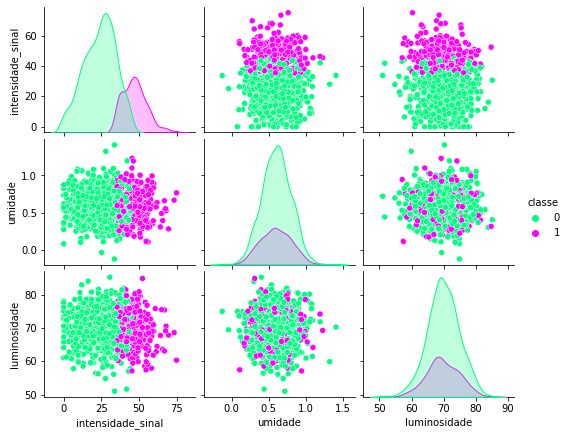

In [3]:
# In[2.2]: Gráfico 'pairplot' com scatters e KDEs por 'falha'

cores_desejadas = {0: 'springgreen', 1: 'magenta'}

g = sns.pairplot(df_rmn[['classe','intensidade_sinal','umidade', 'luminosidade']], hue='classe',
                 palette=cores_desejadas)
g.fig.set_size_inches(8, 6)
plt.show()

In [4]:
# In[2.3]: Estimação do modelo logístico binário pela função 'sm.Logit.from_formula'
#('statsmodels.api')

# O modelo a seguir também pode ser estimado por meio da função 'smf.glm'
#('statsmodels.formula.api')

modelo_rmn = sm.Logit.from_formula('classe ~ intensidade_sinal + umidade + luminosidade',
                                          df_rmn).fit()

# Parâmetros do 'modelo_challenger'
modelo_rmn.summary()


Optimization terminated successfully.
         Current function value: 0.185442
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 classe   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.6752
Time:                        13:21:06   Log-Likelihood:                -185.44
converged:                       True   LL-Null:                       -570.95
Covariance Type:            nonrobust   LLR p-value:                8.319e-167
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -16.7372      2.258     -7.412      0.000     -21.163     -12.311
intensidade_sinal     0.3558      0.027     13.045      0.000       0.302       0.409
umidade              -0.0312      0.640     -0.049      0.961      -1.286       1.224
luminosidade          0.0369      0.026      1.419      0.156      -0.014       0.088
=====================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [5]:
# In[2.4]: Procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
step_rmn = stepwise(modelo_rmn, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 classe ~ Q('intensidade_sinal') + Q('umidade') + Q('luminosidade')
Optimization terminated successfully.
         Current function value: 0.185442
         Iterations 9

 Discarding atribute "Q('umidade')" with p-value equal to 0.9611599756759639 

Estimating model...: 
 classe ~ Q('intensidade_sinal') + Q('luminosidade')
Optimization terminated successfully.
         Current function value: 0.185443
         Iterations 9

 Discarding atribute "Q('luminosidade')" with p-value equal to 0.15586239422174364 

Estimating model...: 
 classe ~ Q('intensidade_sinal')
Optimization terminated successfully.
         Current function value: 0.186458
         Iterations 9

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('umidade')", 'p-value': 0.9611599756759639}
{'atribute': "Q('luminosidade')", 'p-value': 0.15586239422174364}

 Model after stepwise process...: 
 classe ~ Q('intensidade_sin

In [6]:
# In[2.6]: Atribuindo uma coluna no dataframe para os resultados

df_rmn['phat'] = step_rmn.predict()

df_rmn

,classe,intensidade_sinal,umidade,luminosidade,phat
0,0,43.097393,0.668410,73.396712,7.576881e-01
1,1,36.192234,0.397114,72.604725,2.152290e-01
2,1,53.349120,0.355536,64.608831,9.914504e-01
3,0,17.929937,0.700865,66.721904,4.391332e-04
4,0,19.344955,0.372973,74.479639,7.228810e-04
...,...,...,...,...,...
995,0,27.972347,0.469383,73.264523,1.490850e-02
996,0,0.000000,0.567815,70.553358,7.912062e-07
997,0,41.019917,0.708989,77.724101,6.005689e-01
998,0,33.703622,1.411920,70.278373,1.024030e-01


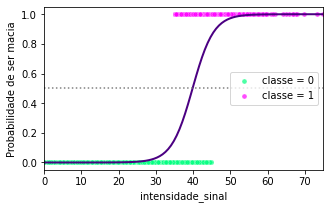

In [7]:
# In[2.7]: Construção da sigmoide
# Probabilidade de evento em função da variável 'temperatura'    

plt.figure(figsize=(5,3))
sns.scatterplot(x=df_rmn['intensidade_sinal'][df_rmn['classe'] == 0],
                y=df_rmn['classe'][df_rmn['classe'] == 0],
                color='springgreen', alpha=0.7, s=25, label='classe = 0')
sns.scatterplot(x=df_rmn['intensidade_sinal'][df_rmn['classe'] == 1],
                y=df_rmn['classe'][df_rmn['classe'] == 1],
                color='magenta', alpha=0.7, s=25, label='classe = 1')
sns.regplot(x=df_rmn['intensidade_sinal'], y=df_rmn['classe'],
            logistic=True, ci=None, scatter=False,
            line_kws={'color': 'indigo', 'linewidth': 2})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('intensidade_sinal', fontsize=10)
plt.ylabel('Probabilidade de ser macia', fontsize=10)
plt.xticks(np.arange(df_rmn['intensidade_sinal'].min(),
                         df_rmn['intensidade_sinal'].max() + 0.01, 10),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(fontsize=10, loc='center right')
plt.show()

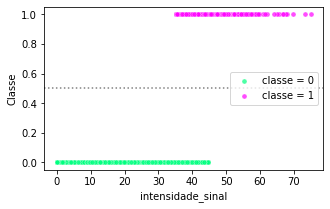

In [8]:
# In[2.7]: Construção da sigmoide
# Probabilidade de evento em função da variável 'temperatura'    

plt.figure(figsize=(5,3))
sns.scatterplot(x=df_rmn['intensidade_sinal'][df_rmn['classe'] == 0],
                y=df_rmn['classe'][df_rmn['classe'] == 0],
                color='springgreen', alpha=0.7, s=25, label='classe = 0')
sns.scatterplot(x=df_rmn['intensidade_sinal'][df_rmn['classe'] == 1],
                y=df_rmn['classe'][df_rmn['classe'] == 1],
                color='magenta', alpha=0.7, s=25, label='classe = 1')
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('intensidade_sinal', fontsize=10)
plt.ylabel('Classe', fontsize=10)
plt.xticks(np.arange(df_rmn['intensidade_sinal'].min(),
                         df_rmn['intensidade_sinal'].max() + 0.01, 10),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(fontsize=10, loc='center right')
plt.show()

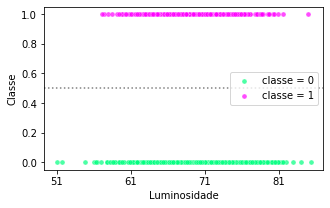

In [9]:
# In[2.7]: Construção da sigmoide
# Probabilidade de evento em função da variável 'temperatura'    

plt.figure(figsize=(5,3))
sns.scatterplot(x=df_rmn['luminosidade'][df_rmn['classe'] == 0],
                y=df_rmn['classe'][df_rmn['classe'] == 0],
                color='springgreen', alpha=0.7, s=25, label='classe = 0')
sns.scatterplot(x=df_rmn['luminosidade'][df_rmn['classe'] == 1],
                y=df_rmn['classe'][df_rmn['classe'] == 1],
                color='magenta', alpha=0.7, s=25, label='classe = 1')
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Luminosidade', fontsize=10)
plt.ylabel('Classe', fontsize=10)
plt.xticks(np.arange(df_rmn['luminosidade'].min(),
                         df_rmn['luminosidade'].max() + 0.01, 10),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(fontsize=10, loc='center right')
plt.show()

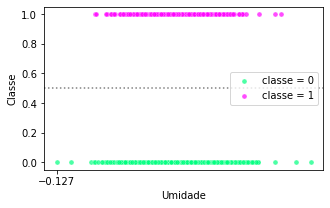

In [10]:
# In[2.7]: Construção da sigmoide
# Probabilidade de evento em função da variável 'temperatura'    

plt.figure(figsize=(5,3))
sns.scatterplot(x=df_rmn['umidade'][df_rmn['classe'] == 0],
                y=df_rmn['classe'][df_rmn['classe'] == 0],
                color='springgreen', alpha=0.7, s=25, label='classe = 0')
sns.scatterplot(x=df_rmn['umidade'][df_rmn['classe'] == 1],
                y=df_rmn['classe'][df_rmn['classe'] == 1],
                color='magenta', alpha=0.7, s=25, label='classe = 1')
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Umidade', fontsize=10)
plt.ylabel('Classe', fontsize=10)
plt.xticks(np.arange(df_rmn['umidade'].min(),
                         df_rmn['umidade'].max() + 0.01, 10),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(fontsize=10, loc='center right')
plt.show()